In [1]:
from IPython.core.display import HTML
with open('../style.css') as file:
    css = file.read()
HTML(css)

This notebook implements an array-based version of Heapsort.

## Graphical Representation of Heaps as Trees

In [2]:
import graphviz as gv

The function `toDot` takes three arguments:
- `A` is an array of natural numbers of length $n$,
- `f` is a natural number such that $0 \leq f < n$ holds,
- `g` is a natural number such that $f < g < n$ holds.

The function returns a graphical representation of the array `A` as a heap. 
This graphical representation is stored as a directed graph with an encoding suitable for `graphviz`. 

The part `A[0:g]` is represented as a binary tree, while the part `A[g:]` is represented
as a list.  Furthermore, all indexes in the range `A[k:g]` satisfy the heap condition.

In [3]:
def toDot(A, f, g):
    n   = len(A)
    dot = gv.Digraph(node_attr={'shape': 'record'})
    for k, p in enumerate(A):
        if k < f:
            dot.node(str(k), label='{' + str(p) + '|' + str(k) + '}', style='filled', fillcolor='red')
        elif k < g:
            dot.node(str(k), label='{' + str(p) + '|' + str(k) + '}', style='rounded')
        else:
            dot.node(str(k), label='{' + str(p) + '|' + str(k) + '}', style='filled', fillcolor='green')
    for k in range(0, n // 2):
        if 2 * k + 1 < g:
            dot.edge(str(k), str(2 * k + 1))
        if 2 * k + 2 < g:
            dot.edge(str(k), str(2 * k + 2))
    return dot

# Heapsort

The function call `swap(A, i, j)` takes an array `A` and  two indexes `i` and `j` and exchanges the elements at these indexes.

In [4]:
def swap(A, i, j):
    A[i], A[j] = A[j], A[i]

The procedure `sink` takes three arguments.
- `A` is the array representing the heap.
- `k` is an index into the array `A`.
- `n` is the upper bound  of the part of this array that has to be transformed into a heap.  

The array `A` itself might actually have more than $n+1$ elements, but for the
purpose of the method `sink` we restrict our attention to the subarray
`A[k:n]`. 
When calling `sink`, the assumption is that `A[k:n+1]` should represent a heap 
that possibly has its heap condition violated at its root, i.e. at index `k`.  The
purpose of the procedure `sink` is to restore the heap condition at index `k`.
- We compute the index `j` of the left subtree below index `k`.
- We check whether there also is a right subtree at position `j+1`.
  
  This is the case if `j + 1 <= n`.  
- If the heap condition is violated at index `k`, we exchange the element at  position `k` 
  with the child that has the higher priority, i.e. the child that is smaller. 
- Next, we check in line 9 whether the heap condition is violated at index `k`.  
  If the heap condition is satisfied, there is nothing left to do and the procedure returns.  
  
- Otherwise, the element at position `k` is swapped with
  the element at position `j`.  
  
  Of course, after this swap it is possible that the heap condition is
  violated at position `j`.  Therefore,  `k` is set to `j` and the `while`-loop continues
  as long as the node at position `k` has at least one child, i.e. as long as 
  `2 * k + 1 <= n`.

In [5]:
def sink(A, k, n):
    while 2 * k + 1 <= n:
        j = 2 * k + 1
        if j + 1 <= n and A[j] > A[j + 1]:
            j += 1
        if A[k] < A[j]:
            return
        swap(A, k, j)
        k = j

The function call `heapSort(A)` has the task to sort the array `A` and proceeds in two phases.
- In phase one our goal is to transform the array `A`into a heap that is stored in `A`.

  In order to do so, we traverse the array `A` in reverse in a loop.  
  The invariant of this loop is that before 
  `sink` is called, all trees rooted at an index greater than 
  `k` satisfy the heap condition.  Initially this is true because the trees that
  are rooted at indices greater than  $(n + 1) // 2 - 1$ are trivial, i.e. they only
  consist of their root node.  
            
  In order to maintain the invariant for index `k`, `sink` is called with
  argument `k`,  since at this point, the tree rooted at index `k` satisfies
  the heap condition except possibly at the root.  It is then the job of $\texttt{sink}$ to
  establish the heap condition at index `k`.  If the element at the root has a
  priority that is too low, `sink` ensures that this element sinks down in the tree
  as far as necessary.
- In phase two we remove the elements from the heap one-by-one and insert them at the end of
  the array.

  When the `while`-loop starts, the array `A` contains a heap.  Therefore,
  the smallest element is found at the root of the heap.  Since we want to sort the
  array `A` descendingly, we move this element to the end of the array `A` and in
  return move the element from the end of the array`A`to the front.
  After this exchange, the sublist `A[0:n-1]` represents a heap, except that the
  heap condition might now be violated at the root.  Next, we decrement `n`, since the
  last element of the array `A` is already in its correct position.  
  In order to reestablish the heap condition at the root, we call `sink` with index
  `0`.

In [6]:
def heap_sort(A):
    n = len(A) - 1
    for k in range((n + 1) // 2 - 1, -1, -1):
        sink(A, k, n)
    while n >= 1:
        swap(A, 0, n)
        n -= 1
        sink(A, 0, n)

The version of `heap_sort` given below adds some animation.

In [7]:
def heap_sort(A):
    n = len(A) - 1
    display(toDot(A, n // 2, len(A)))
    for k in range((n + 1) // 2 - 1, -1, -1):
        sink(A, k, n)
        print(f'k = {k}')
        display(toDot(A[:], k, len(A)))
    while n >= 1:
        swap(A, 0, n)
        display(toDot(A[:], 1, n + 1))
        n -= 1
        sink(A, 0, n)
        display(toDot(A[:], 0, n + 1))

## Testing

In [8]:
import random as rnd

In [9]:
def demo():
    L = [ rnd.randrange(1, 200) for n in range(1, 16) ]
    print("L = ", L)
    heap_sort(L)
    print("L = ", L)

L =  [46, 133, 106, 111, 25, 14, 36, 122, 60, 157, 113, 131, 106, 44, 34]


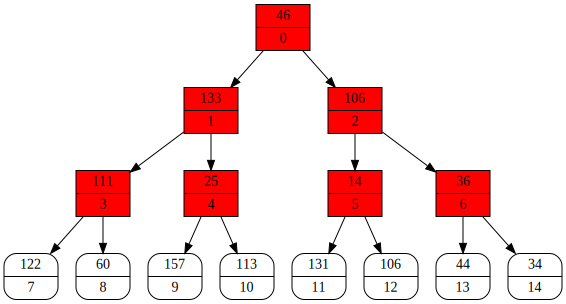

k = 6


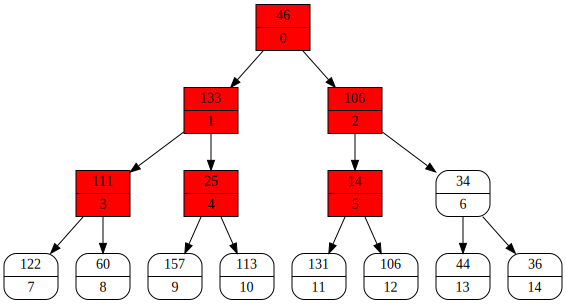

k = 5


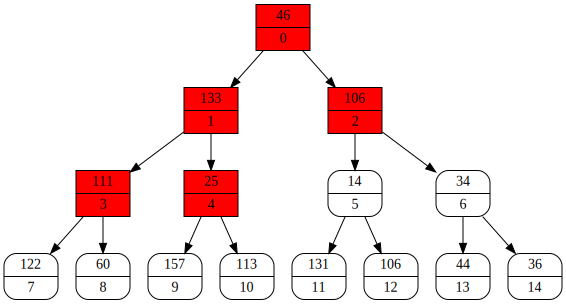

k = 4


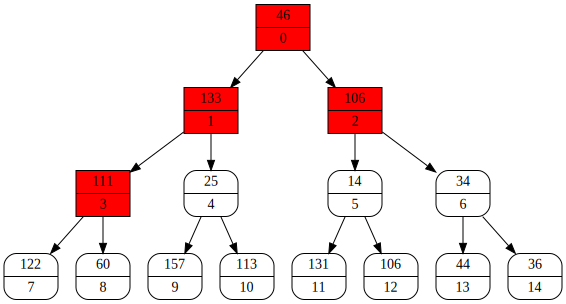

k = 3


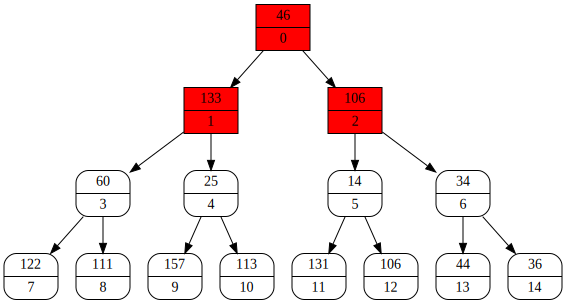

k = 2


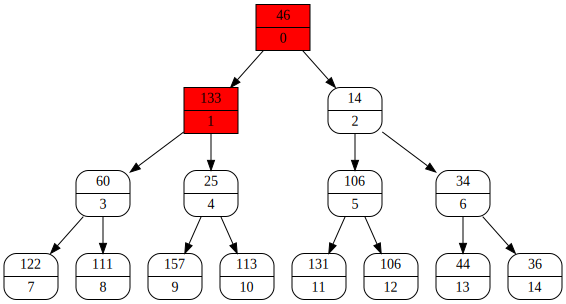

k = 1


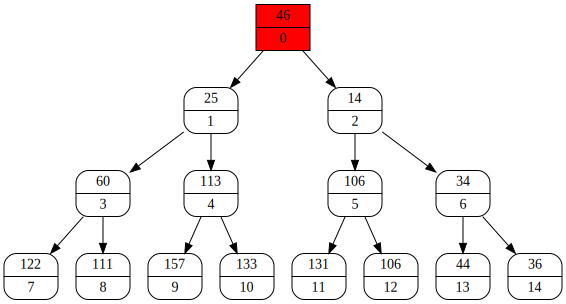

k = 0


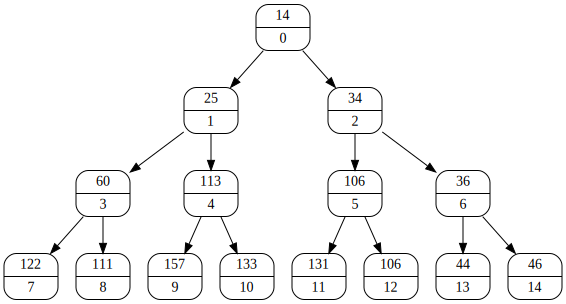

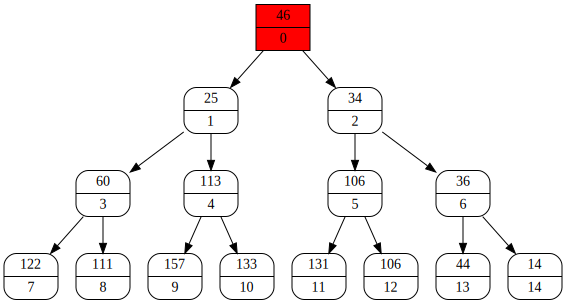

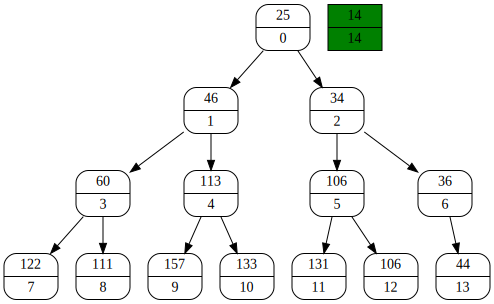

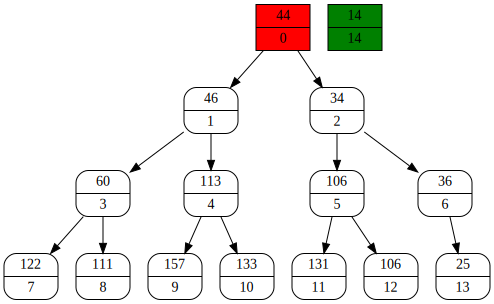

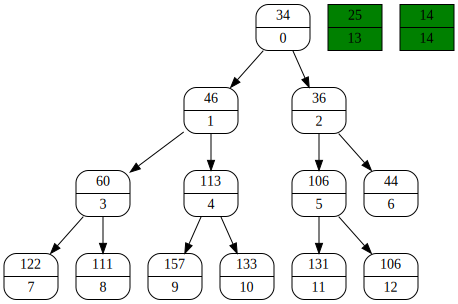

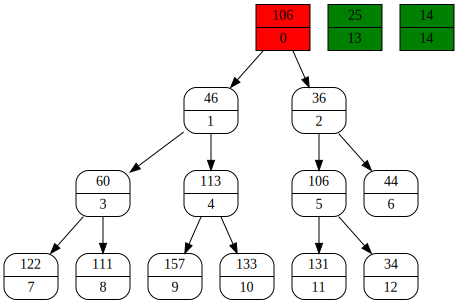

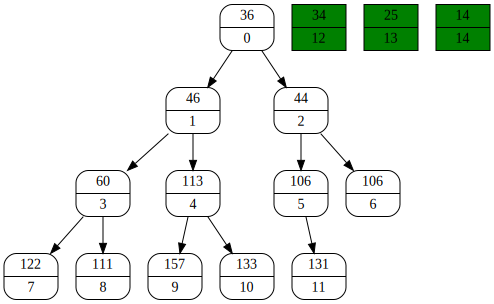

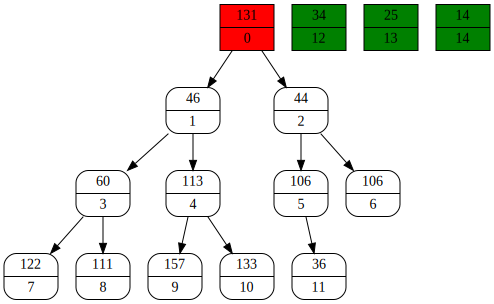

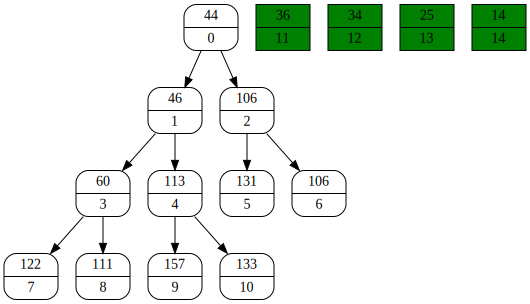

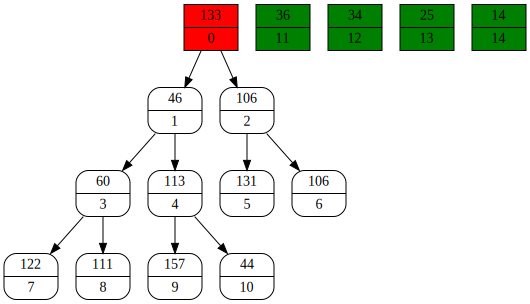

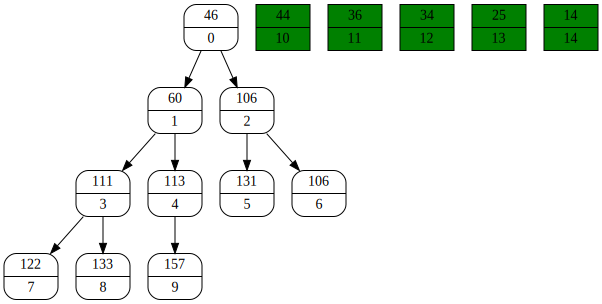

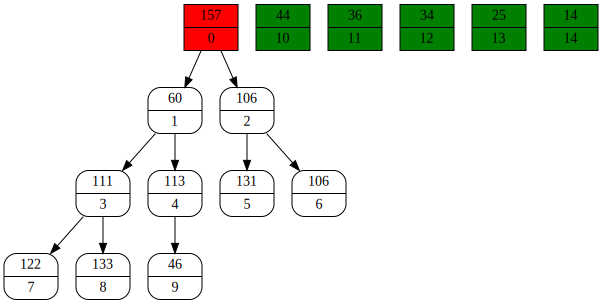

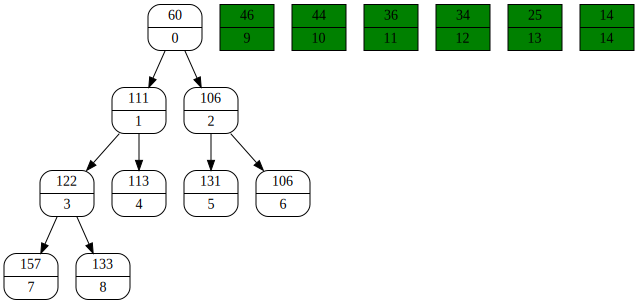

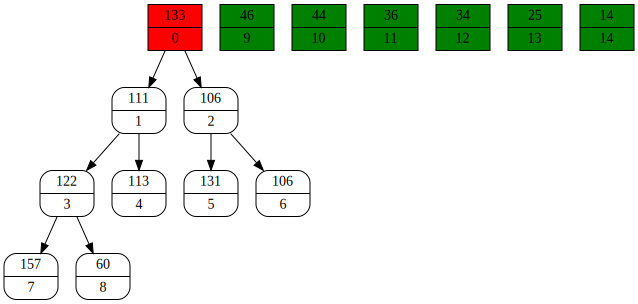

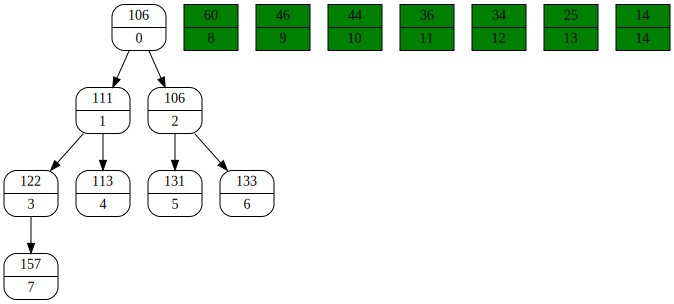

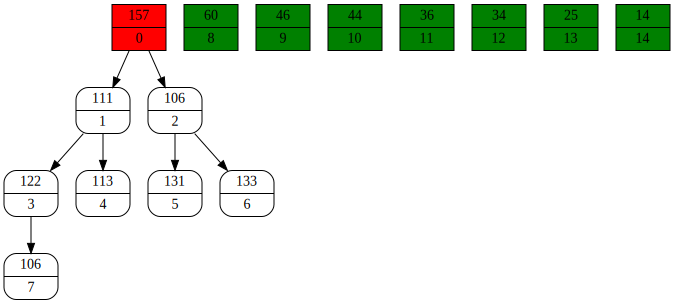

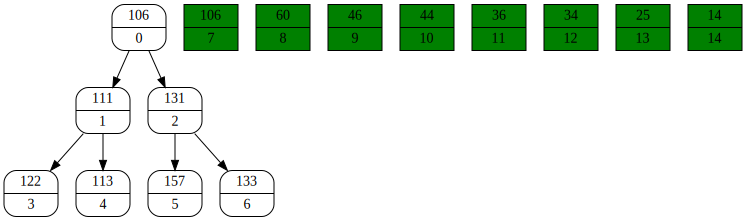

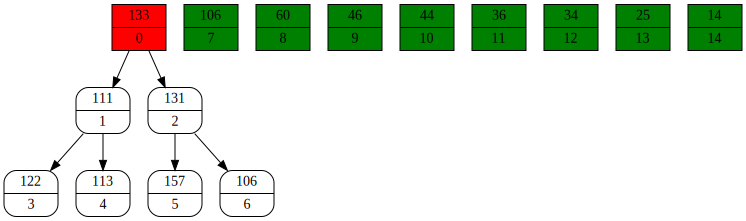

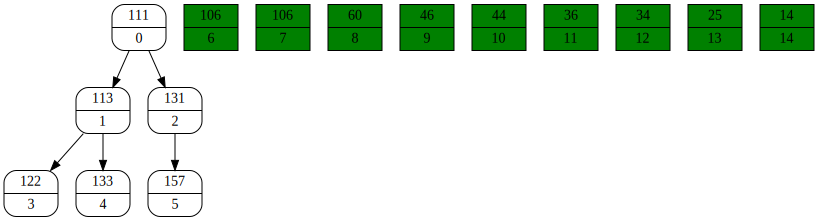

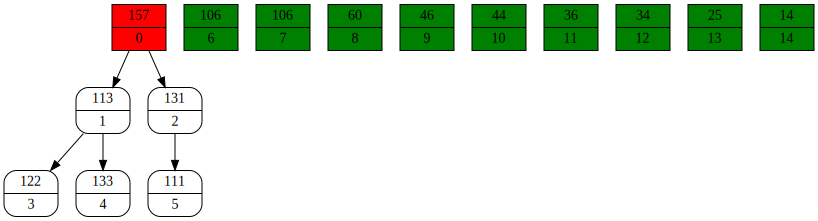

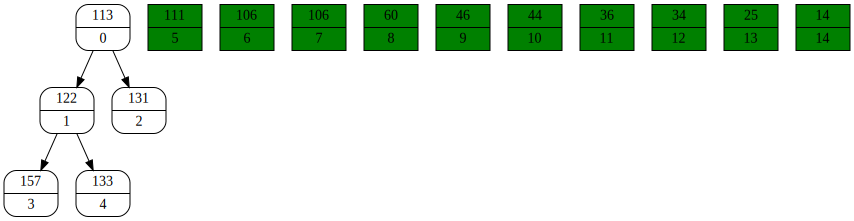

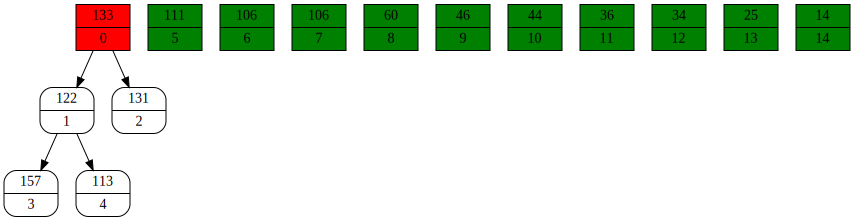

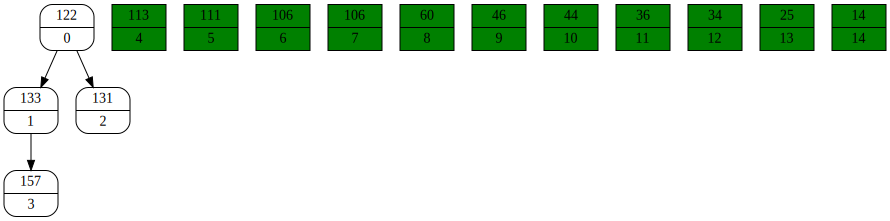

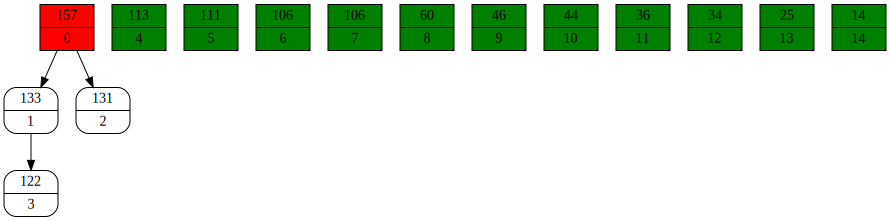

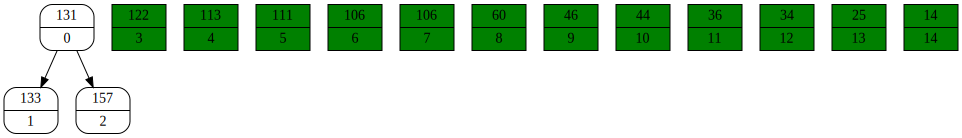

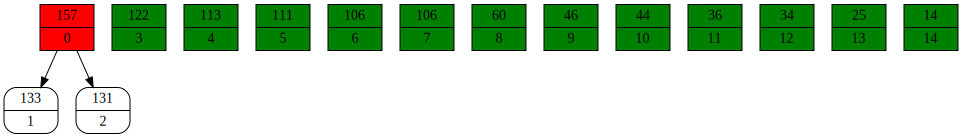

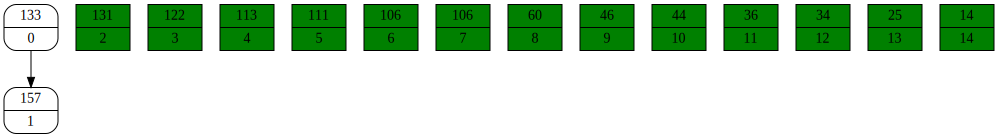

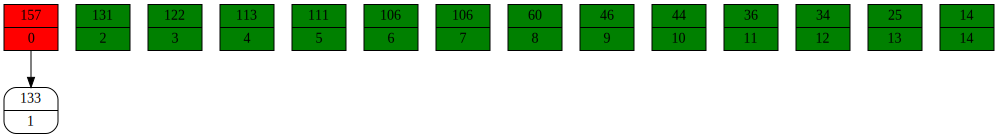

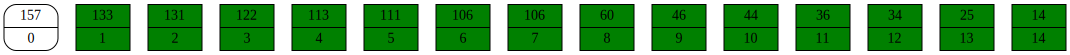

L =  [157, 133, 131, 122, 113, 111, 106, 106, 60, 46, 44, 36, 34, 25, 14]


In [10]:
demo()